In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import seaborn as sns
import cpi


In [2]:
path = r'/Users/jonathan.phelan/Downloads/teacher_salary_data' # use your path
all_files = glob.glob(path + "/*.csv")


In [3]:
all_files

['/Users/jonathan.phelan/Downloads/teacher_salary_data/2006_tsr_public_dataset.csv',
 '/Users/jonathan.phelan/Downloads/teacher_salary_data/2008_tsr_public_dataset.csv',
 '/Users/jonathan.phelan/Downloads/teacher_salary_data/2005_tsr_public_dataset.csv',
 '/Users/jonathan.phelan/Downloads/teacher_salary_data/2004_tsr_public_dataset.csv',
 '/Users/jonathan.phelan/Downloads/teacher_salary_data/2009_tsr_public_dataset.csv',
 '/Users/jonathan.phelan/Downloads/teacher_salary_data/2003_tsr_public_dataset.csv',
 '/Users/jonathan.phelan/Downloads/teacher_salary_data/2007_tsr_public_dataset.csv',
 '/Users/jonathan.phelan/Downloads/teacher_salary_data/2011_tsr_public_dataset.csv',
 '/Users/jonathan.phelan/Downloads/teacher_salary_data/2010_tsr_public_dataset.csv',
 '/Users/jonathan.phelan/Downloads/teacher_salary_data/2012-tsr-public-dataset.csv']

In [4]:
dfs=[]


for i in all_files:
    file=pd.read_csv(i)
    file_name=str(i)
    file_name=file_name.split('/')[5]
    file['filename']=file_name
    dfs.append(file)
    

master_df = pd.concat(dfs, axis=0, ignore_index=True)

/anaconda3/envs/python-data/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (7,34,38) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/anaconda3/envs/python-data/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/anaconda3/envs/python-data/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/anaconda3/envs/python-data/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (1,7,8,14) have mixed types. Specify dtype option on import or set low_memory=False.
  interacti

In [5]:
master_df['year']=master_df['filename'].str[0:4]
master_df['year'].value_counts()

2010    167821
2009    167743
2008    164325
2011    163228
2012    162960
2007    160869
2005    160566
2006    159909
2003    159250
2004    158216
Name: year, dtype: int64

In [6]:
master_df.shape

(1624887, 63)

In [7]:
master_df.head()

,fy,rcdt,dst_name,dst_addr,dst_city,dst_st,dst_zip,dst_zip_plus4,sch_num,sch_name,...,assign4_desc,assignment_5,assign5_desc,assignment_6,assign6_desc,assignment_7,assign7_desc,pct_admin,filename,year
0,2006,05016036002,Winnetka SD 36,1235 Oak St,Winnetka,IL,60093.0,2168,1005,Carleton W Washburne School,...,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,2006_tsr_public_dataset.csv,2006
1,2006,34049220026,Barrington CUSD 220,310 James St,Barrington,IL,60010.0,3329,0004,Barrington High School,...,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,2006_tsr_public_dataset.csv,2006
2,2006,31045046022,SD U-46,355 E Chicago St,Elgin,IL,60120.0,6543,1003,Abbott Middle School,...,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,2006_tsr_public_dataset.csv,2006
3,2006,19022086017,Hinsdale Twp HSD 86,5500 S Grant St,Hinsdale,IL,60521.0,4578,0002,Hinsdale South High School,...,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,2006_tsr_public_dataset.csv,2006
4,2006,05016028002,Northbrook SD 28,1475 Maple Ave,Northbrook,IL,60062.0,5418,2002,Greenbriar Elem School,...,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,2006_tsr_public_dataset.csv,2006


In [8]:
for i in master_df.columns:
    print (i,'--',master_df[i].dtype, master_df[i].isnull().sum())

('fy', '--', dtype('int64'), 0)
('rcdt', '--', dtype('O'), 0)
('dst_name', '--', dtype('O'), 41)
('dst_addr', '--', dtype('O'), 41)
('dst_city', '--', dtype('O'), 41)
('dst_st', '--', dtype('O'), 41)
('dst_zip', '--', dtype('float64'), 41)
('dst_zip_plus4', '--', dtype('O'), 41)
('sch_num', '--', dtype('O'), 0)
('sch_name', '--', dtype('O'), 21)
('sch_addr', '--', dtype('O'), 121104)
('sch_city', '--', dtype('O'), 121104)
('sch_st', '--', dtype('O'), 121104)
('sch_zip', '--', dtype('float64'), 121104)
('sch_zip_plus4', '--', dtype('O'), 121104)
('last_name', '--', dtype('O'), 0)
('first_name', '--', dtype('O'), 0)
('mid_init', '--', dtype('O'), 0)
('gender', '--', dtype('O'), 0)
('race_ethnicity_cd', '--', dtype('O'), 328)
('race_ethnicity_desc', '--', dtype('O'), 419)
('tsr_status_cd', '--', dtype('int64'), 0)
('tsr_status_desc', '--', dtype('O'), 0)
('location_cd', '--', dtype('O'), 9)
('location_desc', '--', dtype('O'), 54)
('emply_type', '--', dtype('O'), 0)
('emply_desc', '--', dt

In [9]:
##Convert isnull values to 'missing' if variable is object, and -9 if variable is float64 or int64
for i in master_df.columns:
    if master_df[i].dtype=='object':
        master_df[i].fillna("missing", inplace = True) 
    else:
        if master_df[i].dtype=='float64' or master_df[i].dtype=='int':
            master_df[i].fillna(-9, inplace=True)
            


In [10]:
master_df.head(10)

,fy,rcdt,dst_name,dst_addr,dst_city,dst_st,dst_zip,dst_zip_plus4,sch_num,sch_name,...,assign4_desc,assignment_5,assign5_desc,assignment_6,assign6_desc,assignment_7,assign7_desc,pct_admin,filename,year
0,2006,05016036002,Winnetka SD 36,1235 Oak St,Winnetka,IL,60093.0,2168,1005,Carleton W Washburne School,...,missing,0.0,missing,0.0,missing,0.0,missing,0.0,2006_tsr_public_dataset.csv,2006
1,2006,34049220026,Barrington CUSD 220,310 James St,Barrington,IL,60010.0,3329,0004,Barrington High School,...,missing,0.0,missing,0.0,missing,0.0,missing,0.0,2006_tsr_public_dataset.csv,2006
2,2006,31045046022,SD U-46,355 E Chicago St,Elgin,IL,60120.0,6543,1003,Abbott Middle School,...,missing,0.0,missing,0.0,missing,0.0,missing,0.0,2006_tsr_public_dataset.csv,2006
3,2006,19022086017,Hinsdale Twp HSD 86,5500 S Grant St,Hinsdale,IL,60521.0,4578,0002,Hinsdale South High School,...,missing,0.0,missing,0.0,missing,0.0,missing,0.0,2006_tsr_public_dataset.csv,2006
4,2006,05016028002,Northbrook SD 28,1475 Maple Ave,Northbrook,IL,60062.0,5418,2002,Greenbriar Elem School,...,missing,0.0,missing,0.0,missing,0.0,missing,0.0,2006_tsr_public_dataset.csv,2006
5,2006,34049038002,Big Hollow SD 38,26051 W Nippersink,Ingleside,IL,60041.0,8785,2002,Big Hollow Elem School,...,missing,0.0,missing,0.0,missing,0.0,missing,0.0,2006_tsr_public_dataset.csv,2006
6,2006,24032101016,Morris CHSD 101,1000 Union St,Morris,IL,60450.0,1268,0001,Morris Community High School,...,missing,0.0,missing,0.0,missing,0.0,missing,0.0,2006_tsr_public_dataset.csv,2006
7,2006,05016214017,Township HSD 214,2121 S Goebbert Rd,Arlington Heights,IL,60005.0,4205,0002,Elk Grove High School,...,missing,0.0,missing,0.0,missing,0.0,missing,0.0,2006_tsr_public_dataset.csv,2006
8,2006,15016299025,City of Chicago SD 299,125 S Clark St,Chicago,IL,60603.0,5200,0030,Mather High School,...,missing,0.0,missing,0.0,missing,0.0,missing,0.0,2006_tsr_public_dataset.csv,2006
9,2006,19022200026,CUSD 200,130 W Park Ave,Wheaton,IL,60189.0,6460,1017,Edison Middle School,...,missing,0.0,missing,0.0,missing,0.0,missing,0.0,2006_tsr_public_dataset.csv,2006


In [11]:
master_df['salary'].describe()

count    1.624887e+06
mean     6.110860e+04
std      2.446809e+04
min      0.000000e+00
25%      4.424000e+04
50%      5.687100e+04
75%      7.417092e+04
max      4.416120e+05
Name: salary, dtype: float64

In [12]:
#Remove cases where salary is listed as $0.
master_df=master_df[master_df['salary']>0]
master_df['salary'].describe()

count    1.616995e+06
mean     6.140685e+04
std      2.415150e+04
min      4.000000e-02
25%      4.441693e+04
50%      5.700600e+04
75%      7.427562e+04
max      4.416120e+05
Name: salary, dtype: float64

In [13]:
#Show mean salary by zip and year.
salaries_zip=pd.pivot_table(data=master_df, index='sch_zip', values='salary', aggfunc=[np.min, np.max, np.median, np.mean, lambda x: x.sem(), len])
#Create a summary table of salary with different stats.
#salaries_zip.columns = salaries_zip.columns.get_level_values(0)
#salaries_zip['std_error']=salaries_zip['std']/np.sqrt(salaries_zip['len'])
salaries_zip

,amin,amax,median,mean,<lambda>,len
,salary,salary,salary,salary,salary,salary
sch_zip,,,,,,
-9.0,38.00,411510.88,63993.200,71545.897771,111.150914,117508.0
60002.0,2398.86,155317.02,49809.455,53882.934976,328.484630,3680.0
60004.0,3709.00,202678.99,69134.885,72301.556845,372.442021,5480.0
60005.0,3480.00,166748.40,63944.945,66891.319658,488.575232,2396.0
60007.0,912.00,201503.10,71718.080,74436.359363,367.561840,5102.0
60008.0,115.32,198583.92,76534.000,77794.352633,427.342934,4029.0
60010.0,2929.57,188754.60,63096.055,69076.722752,334.331932,6370.0
60012.0,20322.68,174207.78,78604.125,80365.826349,839.457742,1090.0


In [14]:
salaries_year=pd.pivot_table(data=master_df, index='year', values='salary', aggfunc=[np.min, np.max, np.median, np.mean, np.std, lambda x: x.sem(), len])
salaries_year.columns = salaries_year.columns.get_level_values(0)
#salaries_year['std_error']=salaries_year['std']/np.sqrt(salaries_year['len'])
salaries_year



,amin,amax,median,mean,std,<lambda>,len
year,,,,,,,
2003,40.00,353351.13,49461.540,53574.750243,20859.142724,52.275926,159217.0
2004,70.00,302746.00,51324.130,55583.790745,21864.080655,54.973064,158184.0
2005,100.00,361146.50,53117.580,57515.463402,22546.076454,56.270140,160541.0
2006,41.00,441612.00,54262.705,58716.460367,23101.872025,57.773459,159896.0
2007,90.00,385378.73,55661.900,60349.983139,23485.898289,58.982433,158551.0
2008,16.00,411510.88,58280.500,62943.360078,24376.322021,60.215071,163880.0
2009,36.00,368589.94,59178.000,63743.418337,24203.229284,59.274479,166729.0
2010,0.04,413000.00,60958.000,65478.907039,24687.961126,60.527710,166365.0
2011,52.21,358750.55,62676.195,67114.777919,25141.948123,62.476086,161946.0


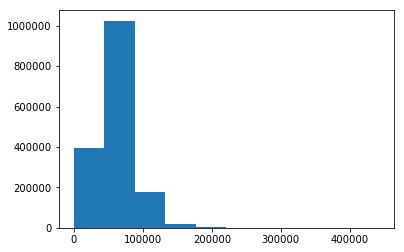

In [15]:
master_df['salary'].hist().grid(False)
plt.show()

/anaconda3/envs/python-data/lib/python2.7/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


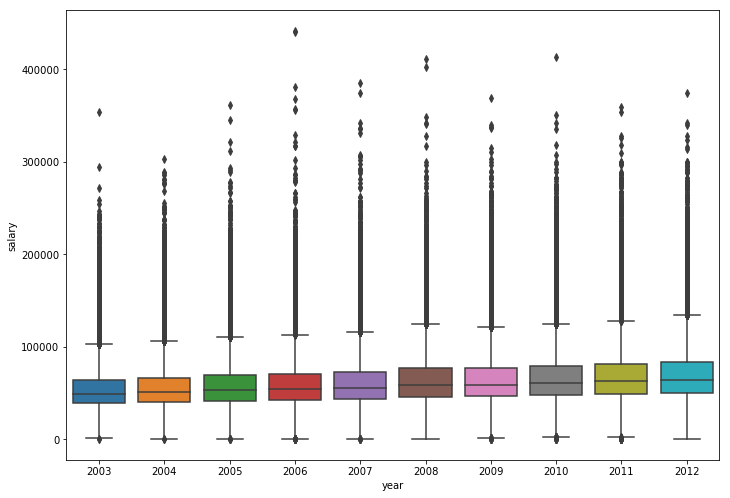

In [17]:
#Show boxplot of salaries by zipcode.
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)
sns.boxplot(x="year", y="salary", data=master_df)
plt.show()

In [18]:
#Install the CPI package to get current dollar values of salaries for comparisons over time.
#!pip install cpi
#import cpi

cpi.update()

cpi.inflate(100, 1950)

master_df.year=master_df.year.astype(int)

master_df['salary_adjusted'] = master_df.apply(lambda x: cpi.inflate(x.salary, x.year, to=2018), axis=1)

master_df.head()

,fy,rcdt,dst_name,dst_addr,dst_city,dst_st,dst_zip,dst_zip_plus4,sch_num,sch_name,...,assignment_5,assign5_desc,assignment_6,assign6_desc,assignment_7,assign7_desc,pct_admin,filename,year,salary_adjusted
0,2006,05016036002,Winnetka SD 36,1235 Oak St,Winnetka,IL,60093.0,2168,1005,Carleton W Washburne School,...,0.0,missing,0.0,missing,0.0,missing,0.0,2006_tsr_public_dataset.csv,2006,118995.571652
1,2006,34049220026,Barrington CUSD 220,310 James St,Barrington,IL,60010.0,3329,0004,Barrington High School,...,0.0,missing,0.0,missing,0.0,missing,0.0,2006_tsr_public_dataset.csv,2006,31101.893800
2,2006,31045046022,SD U-46,355 E Chicago St,Elgin,IL,60120.0,6543,1003,Abbott Middle School,...,0.0,missing,0.0,missing,0.0,missing,0.0,2006_tsr_public_dataset.csv,2006,86642.788830
3,2006,19022086017,Hinsdale Twp HSD 86,5500 S Grant St,Hinsdale,IL,60521.0,4578,0002,Hinsdale South High School,...,0.0,missing,0.0,missing,0.0,missing,0.0,2006_tsr_public_dataset.csv,2006,118514.171134
4,2006,05016028002,Northbrook SD 28,1475 Maple Ave,Northbrook,IL,60062.0,5418,2002,Greenbriar Elem School,...,0.0,missing,0.0,missing,0.0,missing,0.0,2006_tsr_public_dataset.csv,2006,81883.800496


In [19]:
#Remove observations above $165,000.
master_df['salary_adjusted'].quantile([.1, .5, .75, .9, .95, .975, .99])


0.100     44475.677115
0.500     68678.498683
0.750     89535.625031
0.900    109718.626021
0.950    126737.459085
0.975    142408.338977
0.990    162064.358068
Name: salary_adjusted, dtype: float64

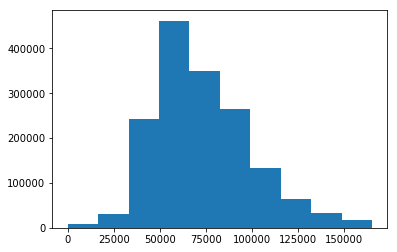

In [20]:

master_df=master_df.loc[master_df['salary_adjusted']<=165000]
master_df['salary_adjusted'].hist().grid(False)
plt.show()


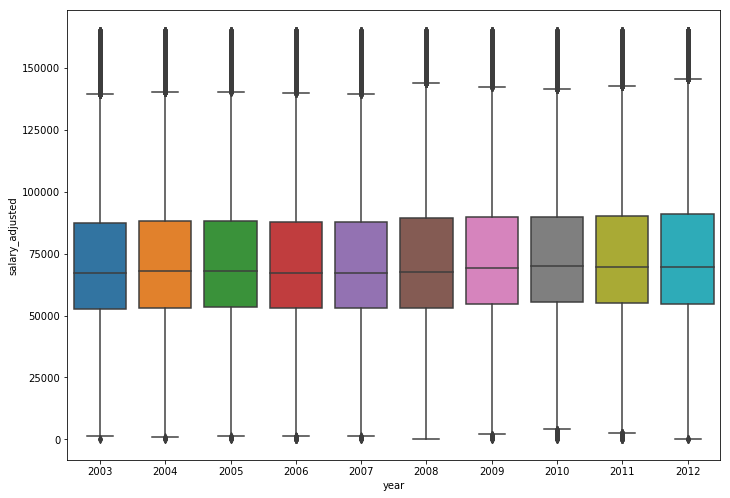

In [21]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)
boxplot=sns.boxplot(x="year", y="salary_adjusted", data=master_df)
plt.show()

In [22]:
salaries_year=pd.pivot_table(data=master_df, index='year', values='salary_adjusted', aggfunc=[np.min, np.max, np.median, np.mean, np.std, lambda x: x.sem(), len])
salaries_year.columns = salaries_year.columns.get_level_values(0)
salaries_year=salaries_year.rename(index=str, columns={'<lambda>':'std_error'})
salaries_year=salaries_year.reset_index()
salaries_year



,year,amin,amax,median,mean,std,std_error,len
0,2003,54.588478,164971.840152,67211.941035,72122.845134,26168.546305,65.846627,157940.0
1,2004,93.051826,164988.279116,67892.819172,72741.212349,26486.618531,66.911647,156693.0
2,2005,128.575013,164997.742427,67975.037768,72810.773094,26387.599563,66.165721,159050.0
3,2006,51.068388,164999.519977,67290.697262,72024.512388,26150.984314,65.694172,158461.0
4,2007,108.996875,164974.666120,67130.018567,71993.991515,25865.217215,65.248004,157144.0
5,2008,18.660734,164987.782834,67712.805702,72453.366729,26226.763395,65.041983,162593.0
6,2009,42.136564,164966.379778,69001.362191,73512.194329,25785.398660,63.436410,165223.0
7,2010,0.046063,164979.818638,69866.685715,74242.579635,25825.980364,63.630286,164735.0
8,2011,58.283786,164992.120563,69693.660039,73925.168941,25749.933162,64.252068,160612.0
9,2012,1.093700,164929.987717,69638.603079,73935.466541,26122.609891,65.233382,160359.0


In [29]:
#Test for differences above. Compare all years to 2012.
from scipy import stats

def ttest(data, groupvar, group1, group2):
    new_data=data.copy()
    new_data=new_data.loc[(new_data[groupvar]==group1)|(new_data[groupvar]==group2)]
    new_data['stdsq']=new_data['std']**2
    new_data['error']=new_data['stdsq']/new_data['len']
    denominator=np.sqrt(new_data['error'].sum())
    mean_diff=new_data['mean'].diff()
    t_stat=mean_diff/denominator
    df=data['len'].min()-1
    pval = stats.t.sf(np.abs(t_stat), df)*2
    if len(pval)>1:
        return pval[1]
    else:
        return 1
    


ttest(salaries_year, 'year', '2011', '2012')


0.9104548277560247

In [25]:
#fig, ax = plt.subplots()
#fig.set_size_inches(11.7, 8.27)
#sns.boxplot(x="race_ethnicity_cd", y="salary", data=master_df)
salaries_race=pd.pivot_table(data=master_df, index='race_ethnicity_desc', values='salary', aggfunc=[np.min, np.max, np.median, np.mean, np.std, len])
salaries_race['standard_error']=salaries_race['std']/np.sqrt(salaries_race['len'])
salaries_race.columns = salaries_race.columns.get_level_values(0)
salaries_race=salaries_race.reset_index()
salaries_race

,race_ethnicity_desc,amin,amax,median,mean,std,len,standard_error
0,American Indian or Alaska Native,19495.40,147855.00,70022.640,70766.991186,19525.474619,506.0,868.013223
1,American Indian or Alaskan Native,41.00,142128.00,57286.625,58441.812558,16635.868916,1976.0,374.241564
2,Asian,2430.00,148339.23,65447.510,67696.070515,21300.547469,3767.0,347.050725
3,Asian or Pacific Islander,309.00,142227.00,56161.530,59000.348100,19458.413246,14363.0,162.362168
4,Black or African American,190.00,150732.00,77578.115,75863.335528,22502.688066,24162.0,144.766462
5,"Black, Non-Hispanic",38.00,142909.00,67211.105,67666.910761,20601.658032,118716.0,59.792615
6,Hispanic,186.00,142300.37,57801.190,60448.439531,19501.876928,55228.0,82.984456
7,Hispanic or Latino,52.21,150732.00,68390.305,69940.002045,21273.190178,15542.0,170.639343
8,Native Hawaiian or Other Pacific Islander,6887.74,129173.57,65226.620,66548.750000,22305.134592,270.0,1357.447263
9,Two or More Races,4497.00,147682.08,67428.750,69416.124408,21259.155179,2364.0,437.242396


In [30]:
for i in salaries_race.race_ethnicity_desc.unique():
    print (i)
    print ("---------")
    print (ttest(salaries_race, 'race_ethnicity_desc', i, 'White'))

American Indian or Alaska Native
---------
3.120580307626747e-08
American Indian or Alaskan Native
---------
1.457580710934442e-53
Asian
---------
1.5808762753009464e-07
Asian or Pacific Islander
---------
3.129929472785573e-116
Black or African American
---------
1.322386666136639e-168
Black, Non-Hispanic
---------
3.4984443576871872e-71
Hispanic
---------
1.2918519032490804e-151
Hispanic or Latino
---------
9.392880888563606e-67
Native Hawaiian or Other Pacific Islander
---------
0.5876073277148335
Two or More Races
---------
9.914897800275641e-15
Unknown
---------
1.620981585484218e-33
White
---------
1
White, Non-Hispanic
---------
8.089870807328321e-268
missing
---------
1.4097903784165392e-52


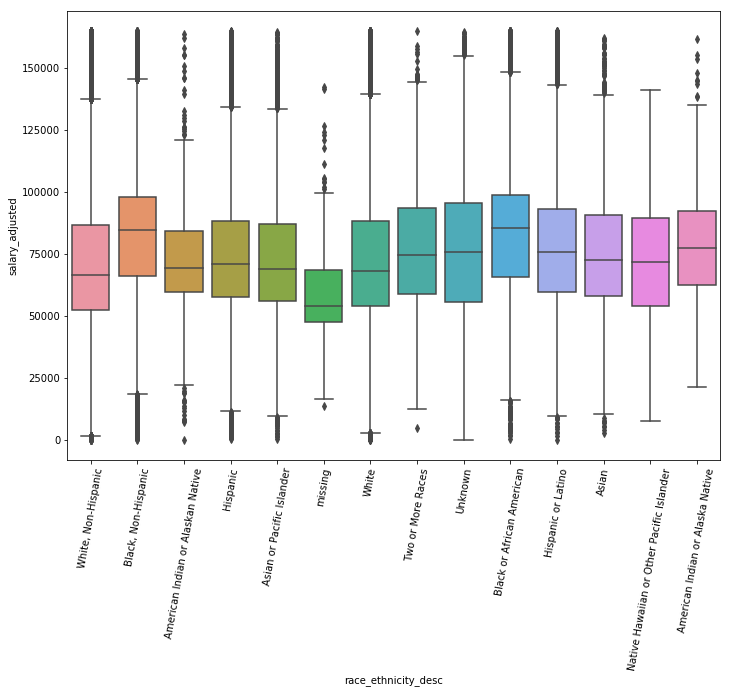

In [31]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
plt.xticks(rotation=80)
boxplot=sns.boxplot(x="race_ethnicity_desc", y="salary_adjusted", data=master_df)
plt.show()

In [32]:
race_teacher_experience=pd.pivot_table(data=master_df, index='race_ethnicity_desc', values='state_exp', aggfunc=[np.min, np.max, np.median, np.mean, np.std, len])
race_teacher_experience['standard_error']=race_teacher_experience['std']/np.sqrt(race_teacher_experience['len'])
race_teacher_experience
race_teacher_experience.columns = race_teacher_experience.columns.get_level_values(0)
race_teacher_experience=race_teacher_experience.reset_index()
race_teacher_experience

,race_ethnicity_desc,amin,amax,median,mean,std,len,standard_error
0,American Indian or Alaska Native,1.0,40.0,10.0,11.569170,7.464116,506.0,0.331820
1,American Indian or Alaskan Native,1.0,42.0,6.0,8.685425,7.332967,1976.0,0.164963
2,Asian,0.1,45.0,8.0,9.594691,7.266962,3767.0,0.118401
3,Asian or Pacific Islander,0.2,44.0,7.0,9.105145,8.030979,14363.0,0.067011
4,Black or African American,0.5,56.0,13.0,14.823417,9.868207,24162.0,0.063485
5,"Black, Non-Hispanic",0.0,55.0,14.0,15.778706,10.728530,118716.0,0.031138
6,Hispanic,0.4,45.0,8.0,10.142225,7.840089,55228.0,0.033361
7,Hispanic or Latino,0.5,53.0,10.0,11.288689,7.816479,15542.0,0.062699
8,Native Hawaiian or Other Pacific Islander,1.0,39.0,10.0,11.281481,8.115135,270.0,0.493871
9,Two or More Races,1.0,44.0,10.0,11.756768,8.321664,2364.0,0.171154


In [40]:
race_teacher_experience_pivoted=race_teacher_experience.pivot_table(columns='race_ethnicity_desc')
race_teacher_experience_pivoted
matrix=race_teacher_experience_pivoted.corr()
for col in matrix.columns:
    matrix[col].values[:] = 0
    
group1=[i for i in race_teacher_experience_pivoted.columns]
group2=[t for t in race_teacher_experience_pivoted.columns]

for i in group1:
    for j in group2:
        pval=ttest(race_teacher_experience, 'race_ethnicity_desc', i, j)
        matrix.at[i,j]=pval

matrix           

race_ethnicity_desc,American Indian or Alaskan Native,Asian,Asian or Pacific Islander,Black or African American,"Black, Non-Hispanic",Hispanic,Hispanic or Latino,Native Hawaiian or Other Pacific Islander,Two or More Races,Unknown,White,"White, Non-Hispanic",missing
race_ethnicity_desc,,,,,,,,,,,,,
American Indian or Alaskan Native,1.000000e+00,9.316685e-02,3.056319e-01,7.682260e-100,1.422109e-121,3.650883e-08,2.476572e-28,1.255830e-04,3.037885e-23,3.026587e-33,7.551523e-74,2.046164e-76,2.415051e-26
Asian,9.316685e-02,1.000000e+00,3.811324e-04,1.658704e-112,2.767000e-139,1.252661e-05,4.490687e-29,1.019923e-03,1.775773e-21,2.773685e-33,4.351323e-86,2.587128e-89,3.738905e-31
Asian or Pacific Islander,3.056319e-01,3.811324e-04,1.000000e+00,3.097822e-161,3.165894e-203,2.605858e-33,3.933796e-68,1.801564e-05,2.461351e-35,1.497085e-57,5.731921e-154,3.739669e-159,6.197623e-28
Black or African American,7.682260e-100,1.658704e-112,3.097822e-161,1.000000e+00,4.253920e-32,5.777315e-167,2.863821e-114,1.025974e-11,8.416307e-44,1.642368e-61,4.134000e-75,3.725233e-72,1.796972e-88
"Black, Non-Hispanic",1.422109e-121,2.767000e-139,3.165894e-203,4.253920e-32,1.000000e+00,6.312071e-239,4.860147e-165,2.267561e-17,7.155990e-66,3.075953e-93,9.359487e-182,1.001406e-187,1.351566e-98
Hispanic,3.650883e-08,1.252661e-05,2.605858e-33,5.777315e-167,6.312071e-239,1.000000e+00,1.870937e-41,2.212544e-02,6.770101e-18,2.507295e-35,3.276180e-188,3.341235e-201,2.842072e-40
Hispanic or Latino,2.476572e-28,4.490687e-29,3.933796e-68,2.863821e-114,4.860147e-165,1.870937e-41,1.000000e+00,9.884600e-01,1.077028e-02,5.767618e-06,5.501726e-82,4.375551e-89,2.913679e-52
Native Hawaiian or Other Pacific Islander,1.255830e-04,1.019923e-03,1.801564e-05,1.025974e-11,2.267561e-17,2.212544e-02,9.884600e-01,1.000000e+00,3.639990e-01,2.202102e-01,2.479169e-04,1.121907e-04,9.817807e-22
Two or More Races,3.037885e-23,1.775773e-21,2.461351e-35,8.416307e-44,7.155990e-66,6.770101e-18,1.077028e-02,3.639990e-01,1.000000e+00,4.749705e-01,6.881471e-14,1.116568e-15,8.872227e-50


In [38]:
#Recode race_ethnicity_desc so the groups are coded properly.

d_race={'American Indian or Alaska Native': 'American Indian or Alaskan Native'}

#Map to the race_ethnicity_desc variable now.

master_df=master_df.replace({"race_ethnicity_desc": d_race})
master_df.race_ethnicity_desc.value_counts()

White, Non-Hispanic                          1091231
White                                         268260
Black, Non-Hispanic                           118716
Hispanic                                       55228
Black or African American                      24162
Hispanic or Latino                             15542
Asian or Pacific Islander                      14363
Unknown                                         6097
Asian                                           3767
American Indian or Alaskan Native               2482
Two or More Races                               2364
missing                                          328
Native Hawaiian or Other Pacific Islander        270
Name: race_ethnicity_desc, dtype: int64

In [39]:
race_teacher_experience=pd.pivot_table(data=master_df, index='race_ethnicity_desc', values='state_exp', aggfunc=[np.min, np.max, np.median, np.mean, np.std, len])
race_teacher_experience['standard_error']=race_teacher_experience['std']/np.sqrt(race_teacher_experience['len'])
race_teacher_experience
race_teacher_experience.columns = race_teacher_experience.columns.get_level_values(0)
race_teacher_experience=race_teacher_experience.reset_index()
race_teacher_experience

,race_ethnicity_desc,amin,amax,median,mean,std,len,standard_error
0,American Indian or Alaskan Native,1.0,42.0,7.0,9.273328,7.449565,2482.0,0.149531
1,Asian,0.1,45.0,8.0,9.594691,7.266962,3767.0,0.118401
2,Asian or Pacific Islander,0.2,44.0,7.0,9.105145,8.030979,14363.0,0.067011
3,Black or African American,0.5,56.0,13.0,14.823417,9.868207,24162.0,0.063485
4,"Black, Non-Hispanic",0.0,55.0,14.0,15.778706,10.728530,118716.0,0.031138
5,Hispanic,0.4,45.0,8.0,10.142225,7.840089,55228.0,0.033361
6,Hispanic or Latino,0.5,53.0,10.0,11.288689,7.816479,15542.0,0.062699
7,Native Hawaiian or Other Pacific Islander,1.0,39.0,10.0,11.281481,8.115135,270.0,0.493871
8,Two or More Races,1.0,44.0,10.0,11.756768,8.321664,2364.0,0.171154
9,Unknown,0.1,48.0,10.0,11.905330,9.182041,6097.0,0.117593


In [121]:
for i in race_teacher_experience.race_ethnicity_desc.unique():
    print (i)
    print ("---------")
    print(ttest(race_teacher_experience, 'race_ethnicity_desc', 'Black, Non-Hispanic', i))

American Indian or Alaskan Native
---------
(0          NaN
4    42.591703
Name: mean, dtype: float64, 269.0, array([            nan, 1.42210899e-121]))
Asian
---------
(1         NaN
4    50.51193
Name: mean, dtype: float64, 269.0, array([            nan, 2.76699969e-139]))
Asian or Pacific Islander
---------
(2          NaN
4    90.315116
Name: mean, dtype: float64, 269.0, array([            nan, 3.16589356e-203]))
Black or African American
---------
(3          NaN
4    13.509954
Name: mean, dtype: float64, 269.0, array([          nan, 4.2539199e-32]))
Black, Non-Hispanic
---------
(4   NaN
Name: mean, dtype: float64, 269.0, array([nan]))
Hispanic
---------
(4          NaN
5   -123.51323
Name: mean, dtype: float64, 269.0, array([            nan, 6.31207112e-239]))
Hispanic or Latino
---------
(4          NaN
6   -64.138762
Name: mean, dtype: float64, 269.0, array([            nan, 4.86014713e-165]))
Native Hawaiian or Other Pacific Islander
---------
(4        NaN
7   -9.08802
Name:

In [123]:
gender_teacher_experience=pd.pivot_table(data=master_df, index='gender', values='state_exp', aggfunc=[np.min, np.max, np.median, np.mean, np.std, len])
gender_teacher_experience['standard_error']=gender_teacher_experience['std']/np.sqrt(gender_teacher_experience['len'])
gender_teacher_experience.columns = gender_teacher_experience.columns.get_level_values(0)
gender_teacher_experience=gender_teacher_experience.reset_index()
gender_teacher_experience

,gender,amin,amax,median,mean,std,len,standard_error
0,,1.0,4.0,2.5,2.333333,1.211060,6.0,0.494413
1,F,0.0,59.0,11.0,13.080445,9.574324,1231548.0,0.008627
2,M,0.0,57.0,11.0,13.724973,10.265611,371256.0,0.016848


In [125]:
ttest(gender_teacher_experience, 'gender', 'F', 'M')

(1          NaN
 2    34.050686
 Name: mean, dtype: float64, 5.0, array([          nan, 4.1083708e-07]))

In [34]:
gender_race=pd.pivot_table(data=master_df, index=['race_ethnicity_desc', 'gender'], values='salary', aggfunc=[np.min, np.max, np.median, np.mean, np.std, len])
gender_race['standard_error']=gender_race['std']/np.sqrt(gender_race['len'])
gender_race


amin       amax  \
                                                    salary     salary   
race_ethnicity_desc                       gender                        
American Indian or Alaska Native          F       19495.40  184340.00   
                                          M       38960.82  161918.41   
American Indian or Alaskan Native         F          41.00  220973.56   
                                          M        6207.25  115346.00   
Asian                                     F        2430.00  259065.05   
                                          M       10314.57  358750.55   
Asian or Pacific Islander                 F         309.00  230610.77   
                                          M        2782.00  341747.61   
Black or African American                 F         190.00  323866.46   
                                          M        1630.13  295229.15   
Black, Non-Hispanic                       F          38.00  439803.00   
                                          M         585.00  340267.33   
Hispanic                                  F         464.00  191169.13   
                                          M         186.00  242825.66   
Hispanic or Latino                        F        1459.00  200676.91   
                                          M          52.21  254426.14   
Native Hawaiian or Other Pacific Islander F        6887.74  129173.57   
                                          M       11014.75  245000.00   
Two or More Races                         F        4497.00  165765.00   
                                          M       12480.00  225196.45   
Unknown                                           60533.00   60533.00   
                                          F           1.00  276454.20   
                                          M        1686.00  196468.12   
White                                     F           1.00  315435.23   
                                          M          58.00  374302.00   
White, Non-Hispanic                       F           0.04  441612.00   
                                          M          50.00  411510.88   
missing                                           13824.00   61820.00   
                                          F       11700.00  121680.00   
                                          M       28128.00  110129.00   

                                                     median          mean  \
                                                     salary        salary   
race_ethnicity_desc                       gender                            
American Indian or Alaska Native          F       68817.000  68853.788964   
                                          M       74666.140  77802.846471   
American Indian or Alaskan Native         F       57668.000  59536.906661   
                                          M       56807.610  57899.705491   
Asian                                     F       64396.855  67131.370909   
                                          M       69261.000  72360.206270   
Asian or Pacific Islander                 F       54903.760  58025.015174   
                                          M       60923.000  64385.184486   
Black or African American                 F       78373.000  76760.984164   
                                          M       75630.000  78275.325903   
Black, Non-Hispanic                       F       67593.500  68383.977870   
                                          M       66778.940  69860.794180   
Hispanic                                  F       57428.850  60224.411491   
                                          M       59780.000  63769.335456   
Hispanic or Latino                        F       68046.520  69527.249641   
                                          M       70532.210  74143.730877   
Native Hawaiian or Other Pacific Islander F       65892.000  65992.351792   
                                          M       65191.240  71126.117576   
Two or More Races          

In [35]:
#Let's look at scatterplots of all floating point variables with our outcome, salary.
vars1=[i for i in master_df.columns if master_df[i].dtype=='float64']
vars1=[i for i in vars1 if 'zip' not in i]
vars1

['salary',
 'dist_exp',
 'state_exp',
 'out_of_state_exp',
 'assignment_2',
 'assignment_3',
 'assignment_4',
 'assignment_5',
 'assignment_6',
 'assignment_7',
 'pct_admin',
 'salary_adjusted']

salary


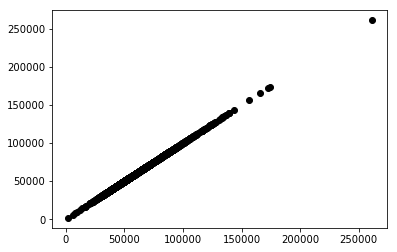

dist_exp


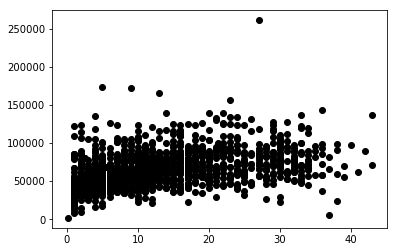

state_exp


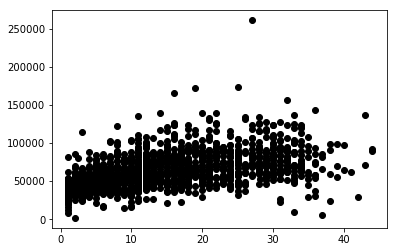

out_of_state_exp


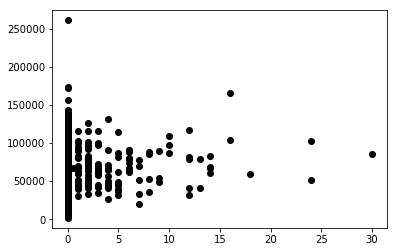

assignment_2


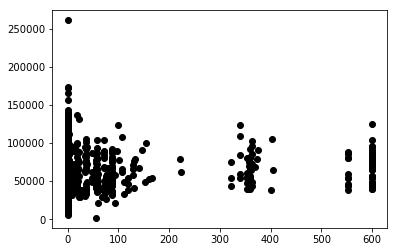

assignment_3


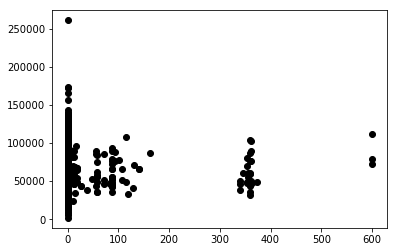

assignment_4


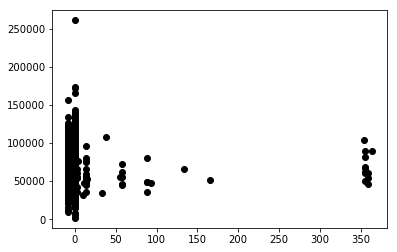

assignment_5


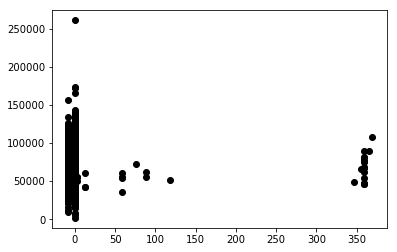

assignment_6


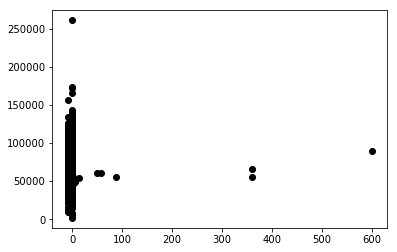

assignment_7


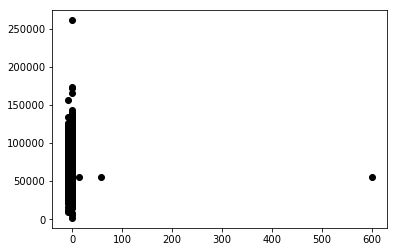

pct_admin


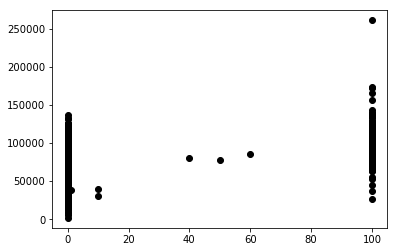

salary_adjusted


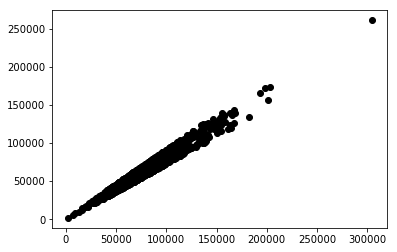

In [36]:
#Take a sample of the data to plot.
sample=master_df.sample(frac=.001)

for i in vars1:
    print (i)
    x=sample[i]
    y=sample['salary']
    plt.plot(x, y, 'o', color='black')
    plt.show()

In [37]:
corr=master_df.corr()

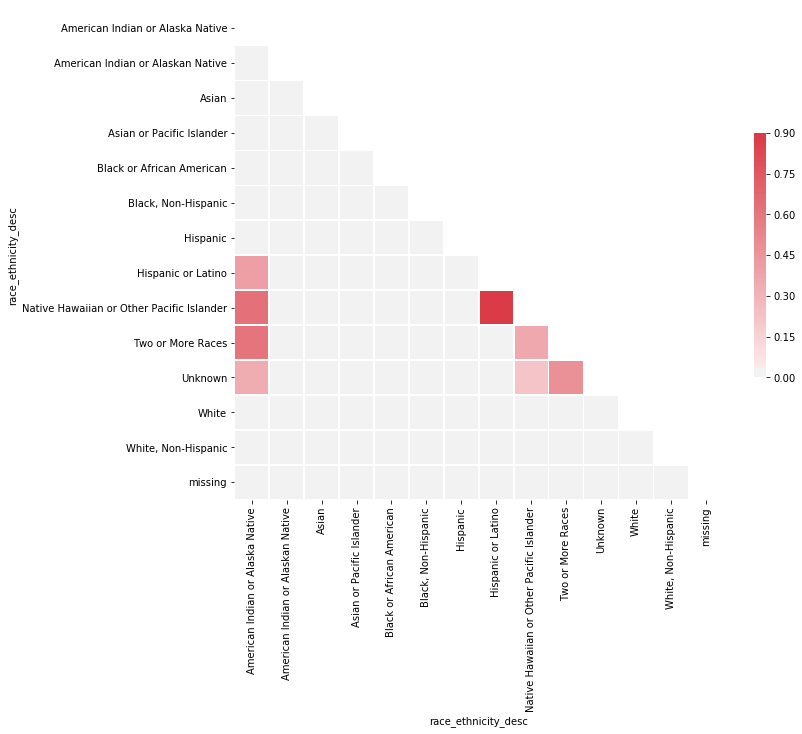

In [35]:

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.9, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [41]:
master_df.high_degre_desc.value_counts()

Masters                                   934209
Baccalaureate                             652371
Doctorate                                  20962
C.A.S., Specialist, 6 Year Certificate      5243
None                                        3826
Registered Nurse                             381
missing                                        3
Name: high_degre_desc, dtype: int64

In [42]:
#Show one last table.  Interested in gender, education, and salary. 
gender_ed=pd.pivot_table(data=master_df, index=['high_degre_desc', 'gender'], values='salary', aggfunc=[np.min, np.max, np.median, np.mean, np.std, len])
gender_ed['standard_error']=gender_ed['std']/np.sqrt(gender_ed['len'])
gender_ed

amin       amax  \
                                                 salary     salary   
high_degre_desc                        gender                        
Baccalaureate                          F           1.00  368000.00   
                                       M          50.00  230000.00   
C.A.S., Specialist, 6 Year Certificate F        1000.00  287853.08   
                                       M         175.00  239492.92   
Doctorate                              F         175.08  402331.22   
                                       M        1539.35  380227.46   
Masters                                        58286.42   61820.00   
                                       F           0.04  441612.00   
                                       M          52.21  411510.88   
None                                           60533.00   60533.00   
                                       F         997.50  193156.78   
                                       M         705.00  221013.27   
Registered Nurse                               13824.00   13824.00   
                                       F        2414.67  116533.35   
                                       M        3051.02   49320.00   
missing                                F       27420.00   27420.00   
                                       M       15799.00   68093.00   

                                                   median           mean  \
                                                   salary         salary   
high_degre_desc                        gender                              
Baccalaureate                          F        44988.000   47276.970700   
                                       M        48398.800   50815.678747   
C.A.S., Specialist, 6 Year Certificate F        73980.510   77267.636717   
                                       M        93708.560   95835.986442   
Doctorate                              F        93694.000   99909.616441   
                                       M       107448.000  116187.080738   
Masters                                         59697.000   59875.105000   
                                       F        64599.375   67100.590791   
                                       M        74121.230   77795.462763   
None                                            60533.000   60533.000000   
                                       F        41128.250   42698.926255   
                                       M        45448.000   46897.512073   
Registered Nurse                                13824.000   13824.000000   
                                       F        34188.960   34054.937398   
                                       M        40036.000   33206.971818   
missing                                F        27420.000   27420.000000   
                                       M        41946.000   41946.000000   

                                                        std       len  \
                                                     salary    salary   
high_degre_desc                        gender                           
Baccalaureate                          F       14547.913530  509124.0   
                                       M       15607.999325  143247.0   
C.A.S., Specialist, 6 Year Certificate F       30014.432540    2769.0   
                                       M       33754.112215    2474.0   
Doctorate                              F       41910.447132   11949.0   
                                       M       53777.551697    9013.0   
Masters                                         1480.692110       4.0   
                                       F       21765.368550  711516.0   
                                       M       26754.344158  222689.0   
None                                                    NaN       1.0   
                                       F       18144.576331    1574.0   
                                       M       18519.147794    2251.0   
Registered Nurse                  

In [43]:
bins = [0, 5, 10, 20, 40, 60]
labels = ["0-5 years","6-10 years","11-20 years", "21-40 years", "40-60 years"]
master_df['years_exp_state'] = pd.cut(master_df['state_exp'], bins=bins, labels=labels)
master_df.years_exp_state.value_counts()

11-20 years    454426
0-5 years      432712
21-40 years    376954
6-10 years     348313
40-60 years      4549
Name: years_exp_state, dtype: int64

In [44]:
exp_ed_gender=pd.pivot_table(data=master_df, index=['high_degre_desc', 'years_exp_state', 'gender'], values='salary', aggfunc=[np.min, np.max, np.median, np.mean, np.std, len])
exp_ed_gender

amin  \
                                                                 salary   
high_degre_desc                        years_exp_state gender             
Baccalaureate                          0-5 years                    NaN   
                                                       F           1.00   
                                                       M          57.00   
                                       6-10 years                   NaN   
                                                       F          70.00   
                                                       M         592.50   
                                       11-20 years                  NaN   
                                                       F          16.00   
                                                       M         176.00   
                                       21-40 years                  NaN   
                                                       F          60.00   
                                                       M         808.00   
                                       40-60 years                  NaN   
                                                       F         967.14   
                                                       M        2659.00   
C.A.S., Specialist, 6 Year Certificate 0-5 years                    NaN   
                                                       F        1000.00   
                                                       M       15566.00   
                                       6-10 years                   NaN   
                                                       F       11307.95   
                                                       M        3793.76   
                                       11-20 years                  NaN   
                                                       F        6250.00   
                                                       M         175.00   
                                       21-40 years                  NaN   
                                                       F        6439.00   
                                                       M        2119.00   
                                       40-60 years                  NaN   
                                                       F        6050.00   
                                                       M       29113.52   
...                                                                 ...   
Registered Nurse                       0-5 years               13824.00   
                                                       F        2414.67   
                                                       M        3051.02   
                                       6-10 years                   NaN   
                                                       F        4800.00   
                                                       M        6480.00   
                                       11-20 years                  NaN   
                                                       F        3415.44   
                                                       M            NaN   
                                       21-40 years                  NaN   
                                                       F        3890.88   
                                                       M            NaN   
                                       40-60 years                  NaN   
                                                       F            NaN   
                                                       M            NaN   
missing                                0-5 years                    NaN   
                                                       F            NaN   
                                                       M            NaN   
                                       6-10 years                   NaN   
                                                       F            NaN   
                 

In [45]:
#Read in income by zip code level.

income_zip=pd.read_excel('/Users/jonathan.phelan/Downloads/MedianZIP-3.xlsx')
income_zip.head()

,Zip,Median,Mean,Pop
0,1001,56662.5735,66687.8,16445
1,1002,49853.4177,75062.6,28069
2,1003,28462.0000,35121,8491
3,1005,75423.0000,82442,4798
4,1007,79076.3540,85802,12962


In [46]:
income_zip['Zip']=income_zip['Zip'].astype(float)

In [47]:
income_zip["Mean"] = pd.to_numeric(income_zip.Mean, errors='coerce')


In [48]:
income_zip.describe()

,Zip,Median,Mean,Pop
count,32634.000000,32634.000000,32627.000000,32634.000000
mean,49875.280750,50938.205509,63452.186741,9192.768187
std,27382.476498,20356.270751,26463.006499,13416.240474
min,1001.000000,32.982400,53.616000,1.000000
25%,27301.250000,38462.000000,48593.189000,736.000000
50%,49875.000000,46503.319500,56949.604700,2756.000000
75%,72133.500000,58255.496175,70341.169450,12512.750000
max,99929.000000,223106.175000,361842.268400,113916.000000


In [49]:
master_df=pd.merge(income_zip, master_df, left_on='Zip', right_on='sch_zip', how='inner')
master_df.head()

,Zip,Median,Mean,Pop,fy,rcdt,dst_name,dst_addr,dst_city,dst_st,...,assign5_desc,assignment_6,assign6_desc,assignment_7,assign7_desc,pct_admin,filename,year,salary_adjusted,years_exp_state
0,60002.0,78051.555,87531.7847,24299,2006,34049034004,Antioch CCSD 34,964 Spafford St,Antioch,IL,...,missing,0.0,missing,0.0,missing,100.0,2006_tsr_public_dataset.csv,2006,117675.976964,21-40 years
1,60002.0,78051.555,87531.7847,24299,2006,34049034004,Antioch CCSD 34,964 Spafford St,Antioch,IL,...,missing,0.0,missing,0.0,missing,0.0,2006_tsr_public_dataset.csv,2006,53073.756300,11-20 years
2,60002.0,78051.555,87531.7847,24299,2006,34049117016,CHSD 117,1625 Deep Lake Rd,Lake Villa,IL,...,missing,0.0,missing,0.0,missing,0.0,2006_tsr_public_dataset.csv,2006,90340.875000,11-20 years
3,60002.0,78051.555,87531.7847,24299,2006,34049034004,Antioch CCSD 34,964 Spafford St,Antioch,IL,...,missing,0.0,missing,0.0,missing,0.0,2006_tsr_public_dataset.csv,2006,100578.604545,21-40 years
4,60002.0,78051.555,87531.7847,24299,2006,34049034004,Antioch CCSD 34,964 Spafford St,Antioch,IL,...,missing,0.0,missing,0.0,missing,0.0,2006_tsr_public_dataset.csv,2006,62069.303359,11-20 years


In [50]:
#Create categories for zip code income.

cut_points=[0, 25000, 50000, 75000, 100000]
labels = ["0-$25,000","$25-$50,000","$50-$75,000", "$75-$100,000"]

master_df['income_bucket'] = pd.cut(master_df['Median'], bins=cut_points, labels=labels)
master_df.income_bucket.value_counts()

$25-$50,000     542665
$50-$75,000     525130
$75-$100,000    291838
0-$25,000        24179
Name: income_bucket, dtype: int64

In [51]:
pd.crosstab(master_df['gender'], master_df['income_bucket']).apply(lambda r: r/r.sum(), axis=1)

income_bucket,"0-$25,000","$25-$50,000","$50-$75,000","$75-$100,000"
gender,,,,
,0.000000,0.400000,0.600000,0.000000
F,0.017790,0.390429,0.379443,0.212338
M,0.016443,0.397753,0.379598,0.206206


In [52]:
cut_points=[0, 25000, 50000, 75000, 100000, np.inf]
labels = ["0-$25,000","$25-$50,000","$50-$75,000", "$75-$100,000", "Greater_100k"]
master_df['salary_bucket'] = pd.cut(master_df['salary_adjusted'], bins=cut_points, labels=labels)
master_df.salary_bucket.value_counts()

$50-$75,000     621447
$75-$100,000    392277
$25-$50,000     253421
Greater_100k    213971
0-$25,000        16429
Name: salary_bucket, dtype: int64

In [53]:
salary_groups=pd.pivot_table(data=master_df, index=['gender', 'salary_bucket'], values='salary_adjusted', aggfunc=[np.mean, len, lambda x: x.sem()])
salary_groups.columns=salary_groups.columns.get_level_values(level=0)
salary_groups
            

mean       len     <lambda>
gender salary_bucket                                      
       0-$25,000                NaN       NaN          NaN
       $25-$50,000              NaN       NaN          NaN
       $50-$75,000     67850.511043       2.0  1645.557817
       $75-$100,000    79604.404142       3.0    91.387239
       Greater_100k             NaN       NaN          NaN
F      0-$25,000       17435.078315   13483.0    52.823587
       $25-$50,000     43038.256712  210611.0    11.923560
       $50-$75,000     61721.927204  491104.0     9.995441
       $75-$100,000    86565.299861  293949.0    13.121910
       Greater_100k   118243.712289  135086.0    47.933818
M      0-$25,000       16360.459216    2946.0   118.625538
       $25-$50,000     43512.900222   42810.0    25.240421
       $50-$75,000     62329.346620  130341.0    19.533068
       $75-$100,000    86843.439857   98325.0    22.730271
       Greater_100k   125140.700087   78885.0    75.076619

In [154]:
grouped_errors=pd.pivot_table(data=master_df, index='assign1_desc', values='salary', aggfunc=[np.mean, lambda x: x.sem(), len])

In [155]:
grouped_errors.columns=grouped_errors.columns.get_level_values(level=0)

In [156]:
grouped_errors=grouped_errors.rename(index=str, columns={'mean': 'mean_salary', '<lambda>':'std_err', 'len':'counts'})
#grouped_errors['upper_95_ci']=grouped_errors.mean_salary+(1.96*(grouped_errors['se']))
#grouped_errors['lower_95_ci']=grouped_errors.mean_salary-(1.96*(grouped_errors['se']))



#grouped_errors.to_csv('subject_salaries_gender.csv')

In [157]:
grouped_errors.sort_values(by='counts', ascending=False)

,mean_salary,std_err,counts
Elementary Self Contained (K-5 Only),54081.715607,31.812689,292779.0
Elementary Self-Contained (K-3 Only),57897.094238,55.865883,101897.0
Learning Behavior Specialist I,63522.279577,71.082173,83119.0
Physical Education,62368.246677,85.777494,72805.0
Administration,96284.768872,99.867091,71242.0
Language Arts (Grades 1-8 Only),57198.470457,77.364944,59462.0
English (Grades 9-12 Only),61999.225948,96.891745,54751.0
Basic and/or General Math,56301.012375,89.825982,43778.0
Cross Categorical,55127.520000,99.681927,34521.0
Specific Learning Disability (LD),53740.613301,103.203088,32545.0


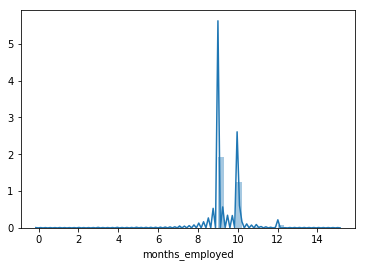

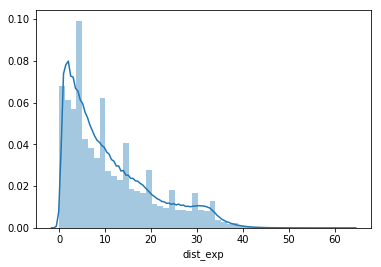

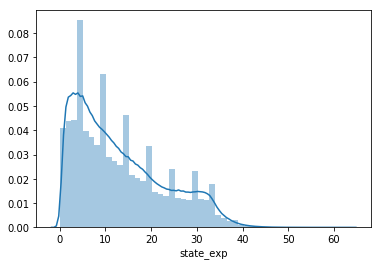

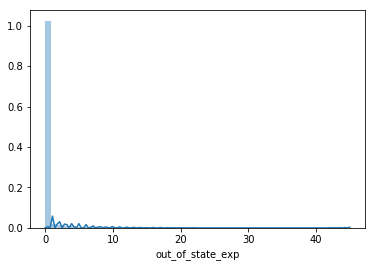

In [227]:
#Relevant columns for modeling
columns=['months_employed','dist_exp', 'state_exp', 'out_of_state_exp']

    
    
for col in columns:
    sns.distplot(master_df[col])
    plt.show()

In [158]:
for i in master_df.columns:
    if '_desc' in i:
        print (i)
        print ('---')
        print (master_df[i].value_counts())

race_ethnicity_desc
---
White, Non-Hispanic                          1020367
White                                         250900
Black, Non-Hispanic                           108376
Hispanic                                       52657
Black or African American                      22377
Hispanic or Latino                             14971
Asian or Pacific Islander                      13554
Unknown                                         5570
Asian                                           3582
Two or More Races                               2250
American Indian or Alaskan Native               1891
American Indian or Alaska Native                 481
missing                                          314
Native Hawaiian or Other Pacific Islander        255
Name: race_ethnicity_desc, dtype: int64
tsr_status_desc
---
Active    1497545
Name: tsr_status_desc, dtype: int64
location_desc
---
One School in this District                             1399366
Multiple Schools in this District     

Elementary Teacher                     562562
High School Teacher                    340130
Junior High/Middle Teacher             204909
Special Education Teacher              185361
Guidance Counselor                      30446
Elementary Principal                    22960
Social Worker                           21948
Librarian/Media Specialist              20051
Speech/Language Pathologist             17764
Assistant Elementary Principal           9270
Psychologist                             9167
Reading Specialist                       8419
Assistant High School Principal          7995
High School Principal                    6885
Nurse                                    6463
Junior High/Middle Principal             5883
Kindergarten                             5626
Assistant Jr High/Middle Principal       5031
Director                                 3844
Student Dean                             3683
Coordinator                              3520
Program Supervisor                

missing                                         1474338
General Social Studies (Middle Grades Only)        7246
General Science                                    2941
Reading                                            2373
Language Arts (Grades 1-8 Only)                    2106
Basic and/or General Math                          1621
History (Middle Grades Only)                        761
U.S. History (Grades 9-12 Only)                     448
Health Education                                    441
Physical Education                                  391
Resource/Consultative Teacher                       376
Art                                                 336
English (Grades 9-12 Only)                          301
Algebra                                             228
Political Science/Civics (Grades 9-12 Only)         211
Computer Literacy/Technology                        209
Physical Science (Middle Grades Only)               190
Biology (Grades 9-12 Only)                      

In [54]:
#Demographic vars.  Create dummies for these variables.
dem_vars=['gender', 'race_ethnicity_desc', 'location_desc', 'emply_desc', 'high_degre_desc', 'location_cd', 'high_grd_desc',
         'low_grd_desc']



In [55]:
data_dem=master_df[dem_vars]
dem_vars_dummies=pd.get_dummies(data_dem, columns=dem_vars)
dem_vars_dummies.head()

,gender_,gender_F,gender_M,race_ethnicity_desc_American Indian or Alaska Native,race_ethnicity_desc_American Indian or Alaskan Native,race_ethnicity_desc_Asian,race_ethnicity_desc_Asian or Pacific Islander,race_ethnicity_desc_Black or African American,"race_ethnicity_desc_Black, Non-Hispanic",race_ethnicity_desc_Hispanic,...,low_grd_desc_Kindergarten,low_grd_desc_NONE,low_grd_desc_Ninth,low_grd_desc_Preschool,low_grd_desc_Second,low_grd_desc_Seventh,low_grd_desc_Sixth,low_grd_desc_Tenth,low_grd_desc_Third,low_grd_desc_missing
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [56]:
dem_vars_dummies=dem_vars_dummies.drop(['gender_ ', 'gender_M'], axis=1)
dem_vars_dummies.head()

,gender_F,race_ethnicity_desc_American Indian or Alaska Native,race_ethnicity_desc_American Indian or Alaskan Native,race_ethnicity_desc_Asian,race_ethnicity_desc_Asian or Pacific Islander,race_ethnicity_desc_Black or African American,"race_ethnicity_desc_Black, Non-Hispanic",race_ethnicity_desc_Hispanic,race_ethnicity_desc_Hispanic or Latino,race_ethnicity_desc_Native Hawaiian or Other Pacific Islander,...,low_grd_desc_Kindergarten,low_grd_desc_NONE,low_grd_desc_Ninth,low_grd_desc_Preschool,low_grd_desc_Second,low_grd_desc_Seventh,low_grd_desc_Sixth,low_grd_desc_Tenth,low_grd_desc_Third,low_grd_desc_missing
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [67]:
#Find float and int vars.
for i in master_df.columns:
    if master_df[i].dtype=='float64' or master_df[i].dtype=='int64':
        print (i)

Zip
Median
Mean
Pop
fy
dst_zip
sch_zip
tsr_status_cd
salary
months_employed
pct_emp
fte
dist_exp
state_exp
out_of_state_exp
high_degre_cd
pos_cd
assignment_1
assignment_2
assignment_3
assignment_4
assignment_5
assignment_6
assignment_7
pct_admin
year
salary_adjusted


In [57]:
continuous=['months_employed', 'pct_emp', 'dist_exp', 'state_exp', 'out_of_state_exp']

In [58]:
continuous_data=master_df[continuous]
continuous_data.head()

,months_employed,pct_emp,dist_exp,state_exp,out_of_state_exp
0,11,100,5.0,31.0,0.0
1,9,100,1.0,11.0,2.0
2,9,100,20.0,20.0,7.0
3,9,100,23.0,23.0,0.0
4,9,100,12.0,12.0,9.0


In [59]:
salary=['salary_adjusted']
outcome=master_df[salary]

In [60]:
#Concatenate the dummies, the continuous vars, and outcome variable into one dataset.

dfs=[continuous_data, dem_vars_dummies, outcome]
overall=pd.concat(dfs, axis=1)
print (overall.shape)

(1497545, 79)


In [61]:
overall.head(10)

,months_employed,pct_emp,dist_exp,state_exp,out_of_state_exp,gender_F,race_ethnicity_desc_American Indian or Alaska Native,race_ethnicity_desc_American Indian or Alaskan Native,race_ethnicity_desc_Asian,race_ethnicity_desc_Asian or Pacific Islander,...,low_grd_desc_NONE,low_grd_desc_Ninth,low_grd_desc_Preschool,low_grd_desc_Second,low_grd_desc_Seventh,low_grd_desc_Sixth,low_grd_desc_Tenth,low_grd_desc_Third,low_grd_desc_missing,salary_adjusted
0,11,100,5.0,31.0,0.0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,117675.976964
1,9,100,1.0,11.0,2.0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,53073.756300
2,9,100,20.0,20.0,7.0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,90340.875000
3,9,100,23.0,23.0,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,100578.604545
4,9,100,12.0,12.0,9.0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,62069.303359
5,9,100,6.0,7.0,11.0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,60260.735085
6,9,100,5.0,6.0,3.0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,54328.083096
7,9,100,1.0,1.0,0.0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,67262.186155
8,9,100,25.0,30.0,0.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,93154.643528
9,9,100,1.0,1.0,0.0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,42792.070574


In [62]:
#For now, don't use the grade taught columns.  Remove those.

cols = [c for c in overall.columns if '_grd' not in c]
cols
overall=overall[cols]

In [63]:
#Create a smaller sample of this data to use for model building.  Too expensive to use all of it.

overall_sample=overall.sample(frac=.10)
overall_sample.shape

(149755, 48)

In [64]:
#Use this for a preliminary model.  Will use grid search with k-fold cross-validation to find good model.

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error

#Define parameters

def create_datasets(master_data):
    y=master_data['salary_adjusted']
    X=master_data.drop('salary_adjusted', axis=1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
    return X_train, X_test, y_train, y_test


X_train, X_test, y_train, y_test=create_datasets(overall_sample)



In [75]:
pipeline1 = Pipeline([('standardize', StandardScaler()),
                    ('lasso', Lasso(fit_intercept=True))])

lasso_params = {'lasso__alpha' : [1, 10, 100, 200, 500, 1000]}

search1=GridSearchCV(estimator=pipeline1, param_grid=lasso_params, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)


#Fit the model with the best parameters.
search1.fit(X_train, y_train)
print("Best cross-validation score: {:.2f}".format(search1.best_score_))

/anaconda3/envs/python-data/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/envs/python-data/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/envs/python-data/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Best cross-validation score: -269573957.59


In [76]:
df_result_lasso = pd.DataFrame(search1.cv_results_)

In [77]:
df_result_lasso

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_lasso__alpha,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,16.539382,0.069367,-2.695746e+08,-2.692542e+08,1,{u'lasso__alpha': 1},2,-2.709213e+08,-2.685656e+08,-2.709611e+08,-2.686014e+08,-2.668412e+08,-2.705955e+08,0.188247,0.022748,1.932806e+06,9.485639e+05
1,12.442107,0.079912,-2.695740e+08,-2.692569e+08,10,{u'lasso__alpha': 10},1,-2.709275e+08,-2.685684e+08,-2.709660e+08,-2.686040e+08,-2.668283e+08,-2.705983e+08,3.543275,0.058744,1.941523e+06,9.486027e+05
2,1.544777,0.099108,-2.697960e+08,-2.694967e+08,100,{u'lasso__alpha': 100},3,-2.712284e+08,-2.688093e+08,-2.712271e+08,-2.688385e+08,-2.669323e+08,-2.708421e+08,0.323234,0.006362,2.024881e+06,9.514730e+05
3,1.059033,0.083480,-2.703471e+08,-2.700792e+08,200,{u'lasso__alpha': 200},4,-2.717937e+08,-2.693368e+08,-2.719178e+08,-2.694810e+08,-2.673298e+08,-2.714200e+08,0.026326,0.024774,2.134151e+06,9.498480e+05
4,1.007126,0.073631,-2.726501e+08,-2.724529e+08,500,{u'lasso__alpha': 500},5,-2.739241e+08,-2.716609e+08,-2.747538e+08,-2.718953e+08,-2.692722e+08,-2.738023e+08,0.034021,0.013448,2.412390e+06,9.590107e+05
5,0.906655,0.075527,-2.787616e+08,-2.785675e+08,1000,{u'lasso__alpha': 1000},6,-2.797224e+08,-2.777599e+08,-2.817458e+08,-2.779403e+08,-2.748163e+08,-2.800024e+08,0.067761,0.036306,2.909403e+06,1.017249e+06


In [84]:
df_result_lasso['rmse']=np.sqrt(df_result_lasso['mean_test_score']*-1)
df_result_lasso

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_lasso__alpha,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score,rmse
0,16.539382,0.069367,-2.695746e+08,-2.692542e+08,1,{u'lasso__alpha': 1},2,-2.709213e+08,-2.685656e+08,-2.709611e+08,-2.686014e+08,-2.668412e+08,-2.705955e+08,0.188247,0.022748,1.932806e+06,9.485639e+05,16418.726614
1,12.442107,0.079912,-2.695740e+08,-2.692569e+08,10,{u'lasso__alpha': 10},1,-2.709275e+08,-2.685684e+08,-2.709660e+08,-2.686040e+08,-2.668283e+08,-2.705983e+08,3.543275,0.058744,1.941523e+06,9.486027e+05,16418.707549
2,1.544777,0.099108,-2.697960e+08,-2.694967e+08,100,{u'lasso__alpha': 100},3,-2.712284e+08,-2.688093e+08,-2.712271e+08,-2.688385e+08,-2.669323e+08,-2.708421e+08,0.323234,0.006362,2.024881e+06,9.514730e+05,16425.466925
3,1.059033,0.083480,-2.703471e+08,-2.700792e+08,200,{u'lasso__alpha': 200},4,-2.717937e+08,-2.693368e+08,-2.719178e+08,-2.694810e+08,-2.673298e+08,-2.714200e+08,0.026326,0.024774,2.134151e+06,9.498480e+05,16442.235735
4,1.007126,0.073631,-2.726501e+08,-2.724529e+08,500,{u'lasso__alpha': 500},5,-2.739241e+08,-2.716609e+08,-2.747538e+08,-2.718953e+08,-2.692722e+08,-2.738023e+08,0.034021,0.013448,2.412390e+06,9.590107e+05,16512.118824
5,0.906655,0.075527,-2.787616e+08,-2.785675e+08,1000,{u'lasso__alpha': 1000},6,-2.797224e+08,-2.777599e+08,-2.817458e+08,-2.779403e+08,-2.748163e+08,-2.800024e+08,0.067761,0.036306,2.909403e+06,1.017249e+06,16696.154047


In [88]:
y_train

683927      95723.351295
419864      85523.469815
1361226     50314.951005
188355      48367.549386
1072272     65497.065600
773596      68531.154701
957725      74705.191055
266274     110117.531318
71676      105542.878336
1234485     65683.439223
631696      93758.639969
1418169     71954.640134
803980      97098.796478
755385      89737.644434
864088     104133.893174
1002585     44666.036492
680054      67883.353147
1482054     57729.313043
1152241     52034.290303
31826       54248.117474
397825      66264.522141
12370      101909.090495
865909      94215.572383
438155      44060.360216
287801     111095.213565
1239210     52873.619649
1000384     48783.823709
1277909     50143.900607
1373139     44454.810676
851966      78528.509507
               ...      
1124632     50081.647063
442230      55083.023101
982034      96781.937215
861400      49863.031056
1409451     42006.862971
857126     106093.039828
1085881     60864.550266
1370244     52233.187510
41903       55748.891230


In [78]:
lasso_predictions=search1.predict(X_test)
lasso_predictions

array([113396.83357562,  54463.94594067,  80794.09450679, ...,
       102500.8846034 ,  97034.51354018,  51155.12399406])

In [79]:
from sklearn.metrics import mean_squared_error

np.sqrt(mean_squared_error(lasso_predictions, y_test))

16241.365215120031

In [80]:
best_lasso=search1.best_estimator_.named_steps['lasso'].coef_
best_lasso

array([ 7.71852653e+03,  4.78773872e+03,  2.26077231e+03,  1.08024176e+04,
        1.89952588e+03, -2.86822845e+03,  3.50032497e+01,  2.27186584e+01,
        9.15409643e+01,  9.05631814e+01,  0.00000000e+00,  4.20566410e+02,
        4.65225632e+02,  1.30892505e+02,  0.00000000e+00, -5.38081895e+01,
        6.97433704e+01, -5.40161464e+02, -6.24513970e+02, -2.42510096e+02,
       -0.00000000e+00, -2.38571728e+02,  5.74398573e+02, -3.86796502e+02,
       -6.27152397e+01,  2.63638873e+01,  4.43407797e+02, -0.00000000e+00,
       -1.56481514e+02, -1.76237907e+03,  1.55636042e+02,  0.00000000e+00,
        0.00000000e+00, -2.05682598e+02, -7.26972191e+03,  1.07293234e+02,
        1.34694857e+03,  0.00000000e+00, -8.47304887e+02, -2.21084776e+02,
        0.00000000e+00, -1.20237011e+00,  4.51578987e+01, -0.00000000e+00,
       -2.20813555e-03, -1.98018177e-03,  0.00000000e+00])

In [81]:
coefficients_df=pd.DataFrame(index=X_train.columns, data=best_lasso)

In [82]:
coefficients_df

,0
months_employed,7718.526526
pct_emp,4787.738724
dist_exp,2260.772313
state_exp,10802.417569
out_of_state_exp,1899.525877
gender_F,-2868.228448
race_ethnicity_desc_American Indian or Alaska Native,35.003250
race_ethnicity_desc_American Indian or Alaskan Native,22.718658
race_ethnicity_desc_Asian,91.540964
race_ethnicity_desc_Asian or Pacific Islander,90.563181


In [83]:
overall_sample.salary_adjusted.std()

26586.02365750504

In [94]:
pipeline1 = Pipeline([('standardize', StandardScaler()),
                    ('lasso', Lasso(fit_intercept=True))])

lasso_params = {'lasso__alpha' : [200]}

search1=GridSearchCV(estimator=pipeline1, param_grid=lasso_params, cv=10, scoring='neg_mean_squared_error', n_jobs=-1)


#Fit the model with the best parameters.
search1.fit(X_train, y_train)
print("Best cross-validation score: {:.2f}".format(search1.best_score_))

Best cross-validation score: -270326334.16
